# **Trabajo Práctico N° 1 Aprendizaje Automático II 2024**

### **Redes Densas y Convolucionales**
**PROBLEMA 1**

---
**Alumnos:**


*   **Fontana Gustavo**
*   **Leguiza Claudia**

---

## **Problema 2**

## **Librerías**

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np
sns.set()

## **Carga del dataset**

**El dataset contiene información sobre el rendimiento académico de estudiantes universitarios, así como diversos factores que podrían influir en él.**

In [ ]:
# CARGAR EL DATASET
data = pd.read_csv("/content/drive/MyDrive/Aprendizaje 2/Student_Performance.csv")

In [ ]:
# Mapear a 0 y 1 la columna objetivo
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

## **Analisis exploratorio**

In [ ]:
data.head()

**El dataset contiene 8 características relevantes con información:**

*  **Hours Studied**: El número total de horas dedicadas al estudio por cada estudiante.

* **Previous Scores**: Las puntuaciones obtenidas por los estudiantes en exámenes previos.

* **Extracurricular Activities**: Si el estudiante participa en actividades extracurriculares (Sí o No).

* **Sleep Hours**: El número promedio de horas de sueño que el estudiante tuvo por día.

* **Sample Question Papers Practiced**: El número de cuestionarios de muestra que el estudiante practicó.

* **Performance Index**: Un índice que representa el rendimiento académico general de cada estudiante, redondeado al entero más cercano. Este índice varía de 10 a 100, donde valores más altos indican un mejor rendimiento.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


**El set de datos contiene variables numéricas.**

*   **Las variables numéricas tienen tipo de datos int64 y float64.**

*   **Además, no hay presencia de valores faltantes en el conjunto de datos.**

In [ ]:
# PRINCIPALES MEDIDAS DESCRPTIVAS DE LAS VARIABLES
data.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.494800,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.499998,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,1.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,1.000000,9.000000,9.000000,100.000000


## **Visualización**

ValueError: num must be an integer with 1 <= num <= 3, not 4

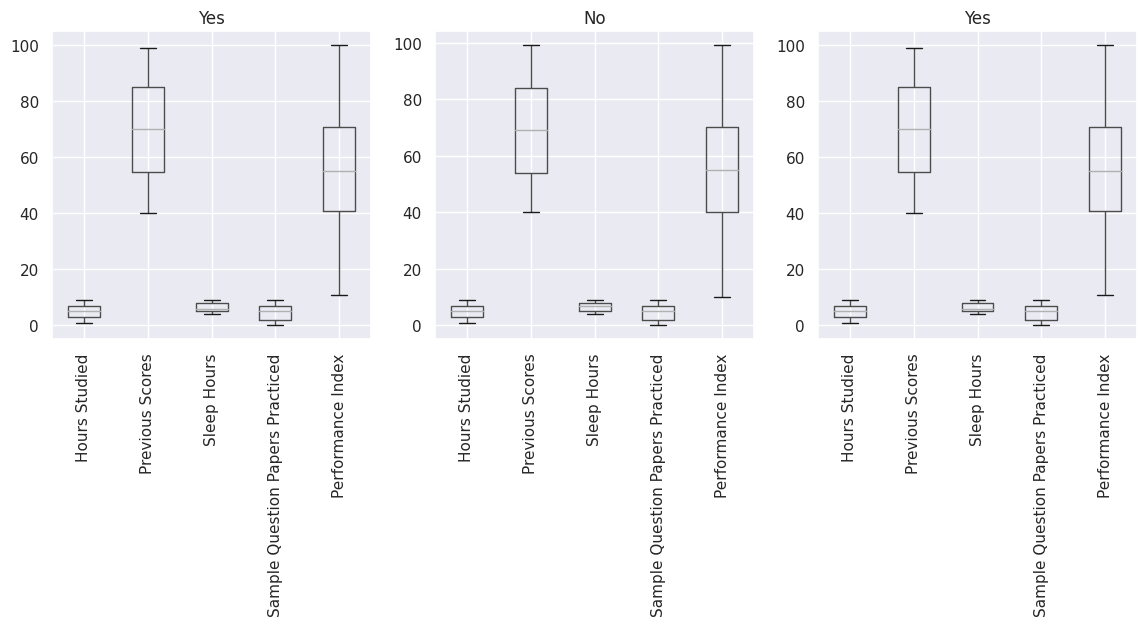

In [ ]:
plt.figure(figsize=(14, 4))

Activity = data['Extracurricular Activities']

for idx, activity in enumerate(Activity):
    plt.subplot(1, 3, idx + 1)
    tmp = data[data['Extracurricular Activities'] == activity]
    tmp.drop(columns=['Extracurricular Activities']).boxplot()
    plt.title(activity)
    plt.xticks(rotation=90)

## **Correlación entre variables**

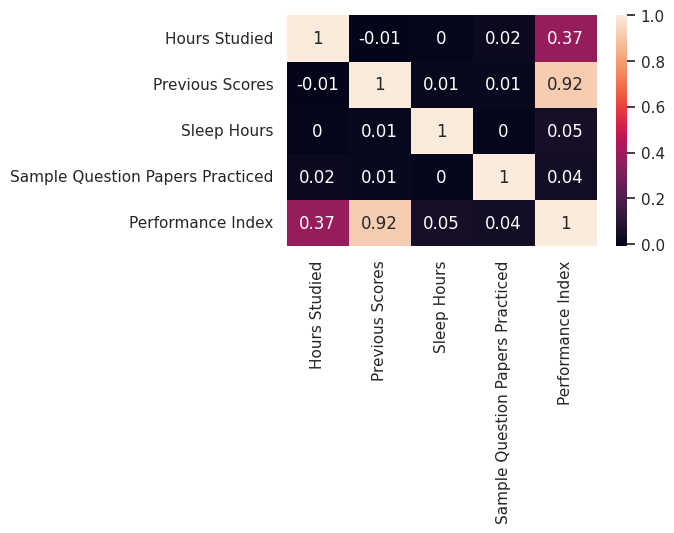

In [ ]:
# CORRELACIÓN ENTRE VARIABLES
corr = data.drop('Extracurricular Activities', axis=1)\
           .corr().round(2)

plt.figure(figsize = (5,3))
sns.heatmap(corr, annot=True)
plt.show()

## **Modelos**

## **Split del dataset**

In [ ]:
# Primer split: dividir en entrenamiento y test
x_train, x_test, y_train, y_test = train_test_split(data.drop('Performance Index', axis=1),
                                                    data['Performance Index'],
                                                    test_size=0.15,
                                                    random_state=42)

# Segundo split: dividir el set de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size=0.1765,
                                                  random_state=42)

### **Escalado de características**

In [ ]:
# ESCALAR LAS CARACTERÍSTICAS
scaler = StandardScaler()

x_train_std = scaler.fit_transform(x_train.select_dtypes(include='int64'))
x_val_std = scaler.transform(x_val.select_dtypes(include='int64'))
x_test_std = scaler.transform(x_test.select_dtypes(include='int64'))

### **Redes Neuronales Densas**

In [ ]:
# CONSTRUIR MODELO
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(5,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 32)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# COMPILAR MODELO
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
              loss='mse',
              metrics=['mse'])

# ENTRENAR MODELO
history = model.fit(
    x = x_train_std,
    y= y_train,
    validation_data=(x_val_std, y_val),
    epochs=30,
    batch_size=32,
)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 441.7042 - val_loss: 5.8098
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0216 - val_loss: 6.1792
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.8976 - val_loss: 6.2418
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.9272 - val_loss: 5.4524
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.6081 - val_loss: 5.6872
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.9665 - val_loss: 9.2727
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7807 - val_loss: 5.2760
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.4021 - val_loss: 8.0101
Epoch 9/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7840 - val_loss: 6.7299
Epoch 10/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.1253 - val_loss: 6.0670
Epoch 11/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5972 - val_loss: 5.0648
Epoch 12/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

## **Modelo con solo dos variables**

In [ ]:
# previous scre, hours studied
x_train_sel = x_train[['Previous Scores', 'Hours Studied']]
x_val_sel = x_val[['Previous Scores', 'Hours Studied']]

# Estandarizar
xx_train_std = scaler.fit_transform(x_train_sel)
xx_val_std = scaler.transform(x_val_sel)

In [ ]:
# previous scre, hours studied
X1 = data['Previous Scores'].to_numpy()
X2 = data['Hours Studied'].to_numpy()
Y = data['Performance Index'].to_numpy()

x = np.column_stack([X1, X2])
y = Y

In [ ]:
# CONSTRUIR MODELO
model_2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)
model_2.compile(optimizer=optimizer, loss='mse')

# ENTRENAR MODELO
history_2 = model_2.fit(
    x = xx_train_std,
    y= y_train,
    validation_data=(xx_val_std, y_val),
    epochs=30,
    batch_size=32,
)

Epoch 1/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 574.1326 - val_loss: 5.7188
Epoch 2/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3996 - val_loss: 5.7011
Epoch 3/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4849 - val_loss: 9.1742
Epoch 4/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.4551 - val_loss: 10.7071
Epoch 5/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.6391 - val_loss: 5.7832
Epoch 6/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7.9827 - val_loss: 6.4113
Epoch 7/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9020 - val_loss: 13.4086
Epoch 8/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.9755 - val_loss: 6.3172
Epoch 9/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.4759 - val_loss: 5.9644
Epoch 10/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8.5626 - val_loss: 8.2884
Epoch 11/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2881 - val_loss: 6.2635
Epoch 12/30
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/